# 필수 라이브러리

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
from IPython.display import Image

In [4]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

mpl.rc('font', family = 'malgun gothic')
mpl.rc('axes', unicode_minus=False)

sns.set_style('darkgrid')
plt.rc('figure', figsize=(10, 8))

warnings.filterwarnings('ignore')

# 데이터 로딩과 데이터 탐색

In [6]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score
from sklearn.metrics import f1_score, confusion_matrix, precision_recall_curve, roc_curve

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

diabetes = pd.read_csv('C:/k_digital/source/data/diabetes.csv')
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


피마 당뇨병 데이터 세트 구성</br>
Pregnancies : 임신횟수</br>
Glucose : 포도당 부하 검사 수치</br>
BloodPressure : 혈압</br>
SkinThickness : 팔 삼두근 뒤쪽의 피하지방 측정값</br>
Insulin : 혈청 인슐린</br>
BMI : 체질량 지수</br>
DiabetesPedigreeFunction : 당뇨 내력 가중치 값</br>
Age : 나이</br>
Outcome : 당뇨여부(0 또는 1)

In [7]:
diabetes['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [8]:
diabetes.info()
# read_csv를 통해 읽어왓으니까 DataFrame
# 결측값이 없음
# 아홉개의 열
# 모두 숫자 변수로 되어있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
diabetes.describe()
# 최소값이 0인것들이 꽤 많음

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


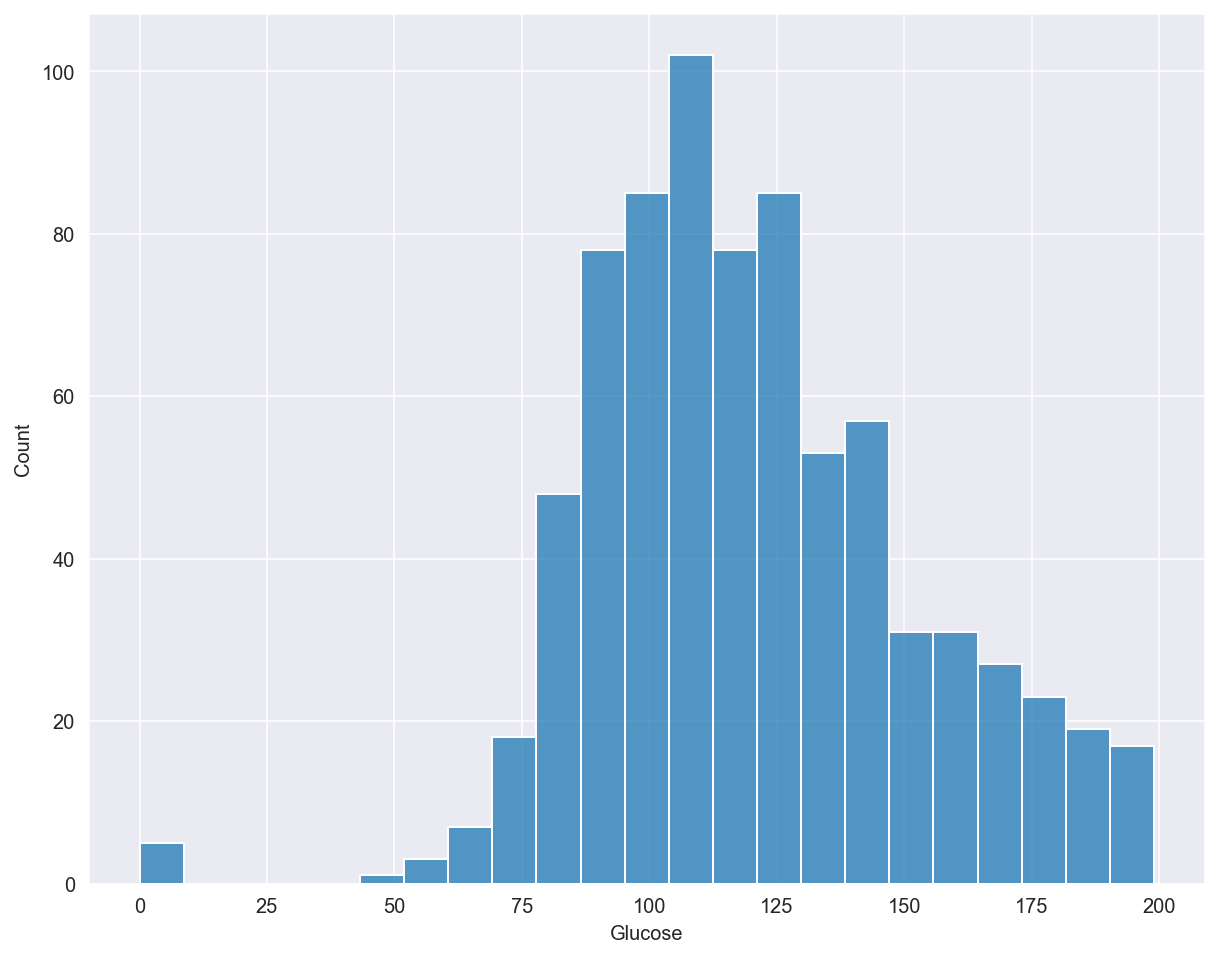

In [11]:
sns.histplot(data = diabetes, x = 'Glucose', kde=False)
plt.show()

In [13]:
diabetes['Glucose'].value_counts()

99     17
100    17
111    14
129    14
125    14
       ..
191     1
177     1
44      1
62      1
190     1
Name: Glucose, Length: 136, dtype: int64

In [15]:
diabetes.count()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

In [16]:
diabetes.count()[0]
# 첫번째꺼 하나만 갖고오려고 0번째 인덱스 지정해주는거임

768

In [19]:
# 0값을 검사할 컬럼명 리스트
zero_features = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin', 'BMI']

# 전체 데이터 건수
total_count = diabetes.count()[0]

# 각 feature별 0값이 차지하는 비율분석
for feature in zero_features:
    zero_count = diabetes[feature].value_counts()[0]
    zero_rate = zero_count / total_count * 100
    print(f'{feature}의 0건수 : {zero_count}, 퍼센트 : {zero_rate : .2f}%')
# feature랑 zero_count랑 zero_rate가 각각 어디어디 들어가는지 잘 보시라

Glucose의 0건수 : 5, 퍼센트 :  0.65%
BloodPressure의 0건수 : 35, 퍼센트 :  4.56%
SkinThickness의 0건수 : 227, 퍼센트 :  29.56%
Insulin의 0건수 : 374, 퍼센트 :  48.70%
BMI의 0건수 : 11, 퍼센트 :  1.43%


In [21]:
# SkinThikness, Insulin은 0값의 비율이 높아 삭제하긴 무리가 있어 대체값이 필요해 보인다
# zero_features 리스트 내부에 저장된 개별 피처들에 대해서 0값을 평균 값으로 대체
mean_zero_features = diabetes[zero_features].mean()
diabetes[zero_features]=diabetes[zero_features].replace(0, mean_zero_features)

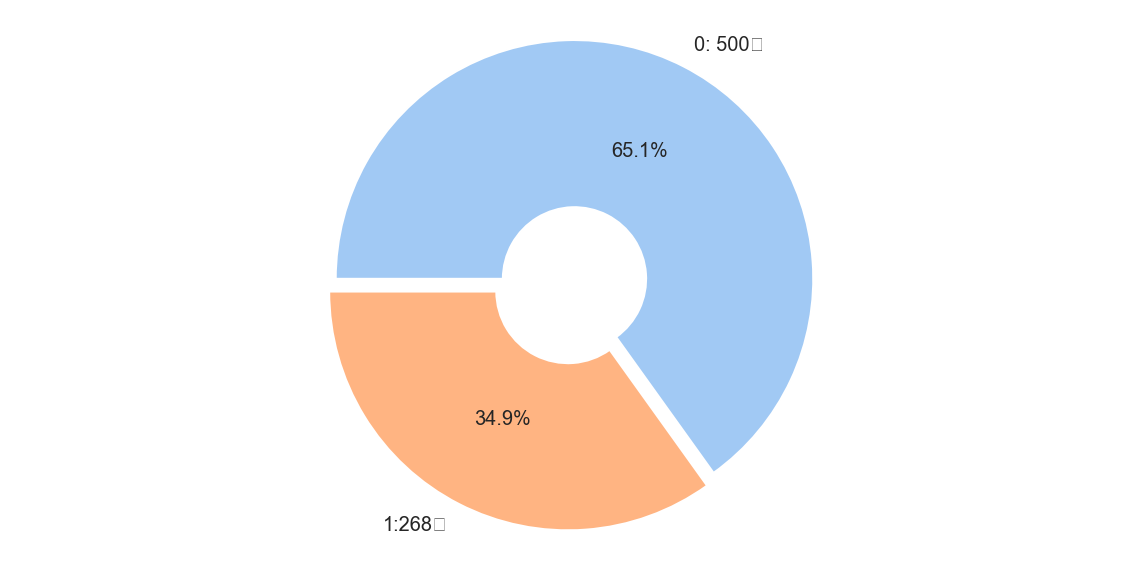

In [25]:
plt.figure(figsize=(10,5))

frequency = diabetes['Outcome'].value_counts()
label = [f'0: {frequency[0]}개', f'1:{frequency[1]}개']
         
plt.pie(frequency,
       startangle = 180,
       counterclock = False,
       explode = [0.03] * 2,
       autopct = '%1.1f%%',
        labels = label,
        colors = sns.color_palette('pastel', 2),
        wedgeprops = dict(width=0.7)
       )
         
plt.axis('equal')
plt.show()


# 정확도로 하는 거 보다 재현율로 하는 게 좋은가 
# 2배로 더 많은게 두배이다. ngegaive
# 정확도란? 맞춘 것들을 예측한 정답
# 이럴 때엔 재현율로 하는 게 좋다
# 전체 768개 데이터 중 Negative가 500개(65.1%), Positive가 268개(34.9%)로 이루어져 있다.
# Negative가 많으므로 정확도보다는 재현율에 초점을 맞춘다.
# 정확도보다 재현율로 평가하는게 좋다

# 로지스틱 회귀 모델 구현

In [26]:
diabetes.head()
# 다 숫자로 되어있지만 단위차이가 커서 스케일링을 해야됨

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
4,0,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1


In [ ]:
# X = diabetes[:, :-1]
# y = diabetes.Outcome
# # 피처와 타겟을 담고

# # StandardScaler
# scaler = StandardScaler()
# # 첫글자 대문자 : 클래스 => 인스턴스객체가 필요하다
# scaler.fit(X)
# X_scaled = scaler.transform(X)
# # 스케일링

In [30]:
# 로지스틱 회귀 모델 구현
X = diabetes.iloc[:, :-1]
y = diabetes.Outcome

# MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

정규화는 데이터들의 분포가 평균이 0이고 분산이 일정하게 되어있는 모양을 원할 때 쓰는 거
<br></br>
표준화는 데이터들의 계산하는 값이 다르거나 편차가 커서 비교하기 힘들 때 쓴다고 알고있는데...쓰다보니 자신감0

## 학습/검증 데이터 분리

- 클래스별 비율에 맞게 분리

In [31]:
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size = 0.2, stratify = y, random_state = 156)

## Logistic Regression

In [36]:
# from sklearn.metrics import roc_auc_score  ## AUC 점수 함수

# def get_clf_eval(y_test, pred = None, pred_proba = None):
#     confusion = confusion_matrix(y_test, pred)
#     accuracy = accuracy_score(y_test, pred)
#     precision = precision_score(y_test, pred)
#     recall = recall_score(y_test, pred)
#     f1 = f1_score(y_test, pred)
#     # ROC-AUC 추가
#     roc_auc = roc_auc_score(y_test, pred_proba)
    
#     print('오차 행렬')
#     print(confusion)
    
#     # ROC-AUC print 추가
#     print('정확도 : {0:.3f}, 정밀도 : {1:.3f}, 재현율 : {2:.3f}, \
#     F1 : {3:.3f}, AUC : {4:.3f}'.format(accuracy, precision, recall, f1, roc_auc))


In [ ]:
# from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

# def  get_clf_eval(y_test, pred=None, pred_proba=None):
#     confusion = confusion_matrix(y_test, pred)
#     accuracy = accuracy_score(y_test, pred)
#     precision = precision_score(y_test, pred)
#     recall = recall_score(y_test, pred)
#     f1 = f1_score(y_test, pred)
#     roc_auc = roc_auc_score(y_test, pred_proba)

In [40]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, roc_auc_score

def  get_clf_eval(y_test, pred=None, pred_proba=None):
    confusion = confusion_matrix(y_test, pred)
    accuracy = accuracy_score(y_test, pred)
    precision = precision_score(y_test, pred)
    recall = recall_score(y_test, pred)
    f1 = f1_score(y_test, pred)
    roc_auc = roc_auc_score(y_test, pred_proba)
    
    print('오차 행렬')
    print(confusion)
 
    print('정확도: {0:.4f}, 정밀도: {1:.4f}, \
    재현율: {2:.4f}, F1: {3:.4f}, AUC:{4:.4f}'.format(accuracy, precision, recall, f1, roc_auc))


In [41]:
# 모델 구현
lr = LogisticRegression()

# 학습
lr.fit(X_train, y_train)

# 예측
pred = lr.predict(X_test)
pred_proba_po = lr.predict_proba(X_test)[:, 1].reshape(-1, 1)
# 열은 1열로 하되, 행은 있는대로 다 표시

In [42]:
get_clf_eval(y_test, pred, pred_proba_po)
# 오차행렬을 구하는 함수(사용자정의함수)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674,     재현율: 0.6111, F1: 0.6804, AUC:0.8487


### 혼돈 행렬(Confusion Matrix, 오차 행렬)

- TN : Negative값 0으로 예측했고, 실제값도 Negative값 0인 경우의 수
- FP : Positive값 1로 예측했고, 실제값은 Negative값 0인 경우의 수
- FN : Positive값 1로 예측했고, 실제값은 Positive값 1인 경우의 수
- TP : Negative값 0으로 예측했고, 실제값도 Positive값 1로 나온 경우의 수
<br></br>
1. 정확도 : 전체 데이터개수 대비 정답을 맞춘 데이터의 개수
  - Accuracy = (TN + TP) / (TN + FP + FN + TP)
<br>
2. 정밀도와 민감도 : 비슷하지만 조금 다른 지표이며, 불균일한 데이터셋을 다룰 때 유용한 지표가 된다
  - 불균일한 데이터셋이란 데이터의 1과 0의 비율이 7:3 또는 3:7이상 차이가 나는 상태를 의미한다
  - 정밀도(precision) : 모델이 1이라고 예측했을때 얼마나 잘 맞는지의 비율
    -  TP / (FP + TP)
  - 재현율(= 민감도, recall) : 실제 1인 값을 모델이 얼마나 1로 잘 예측했는지에 대한 비율
    - TP / (TP + FN)
<br>
3. F1 score : 정밀도와 민감도를 통합한 지표로 정밀도와 민감도의 조화평균값
  - 우리가 만든 모델이 얼마나 성능이 좋은지 확인할 때 사용
  - 한개의 지표(정밀도와 재현율 중)를 정리할 필요가 있을 때 적합하다
    - 2 * (precision * recall) / (precision + recall)
<br>
</br>
- 이진분류 문제 중 암에 걸렸는지 찾는 문제에서 진단이 암일 경우는 1, 암이 아닐 경우는 0을 의미한다.
- 생존여부를 판단하는 문제에서 생존의 경우 1, 아닐 경우가 0
- 우리가 알아내려는 값이 1이 된다.

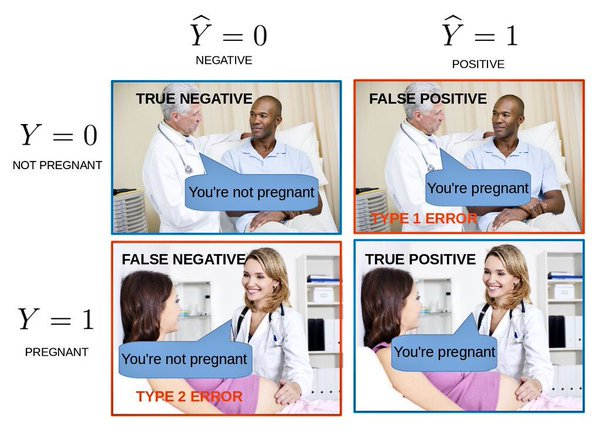

In [56]:
from IPython.display import Image
Image('https://skappal7.files.wordpress.com/2018/08/confusion-matrix.jpg', width=600)

# 그림의 왼쪽은 실제
#       위쪽은 예측

## 정밀도/재현율 시각화

In [48]:
import matplotlib.ticker as ticker

def precision_recall_curve_plot(y_test, pred_proba_po):
    # precision_recall_curve(실제 y, Positve로 예측할 확률)
    precisions, recalls, thresholds = precision_recall_curve(y_test, pred_proba_po)

    # plot
    # y축인 precisions와 recalls의 갯수 = threshold 갯수 + 1 이어서 x,y 갯수를 동일하게 맞춰줌
    thres_boundary = thresholds.shape[0]
    plt.plot(thresholds, precisions[:thres_boundary], "r", label="precision")
    plt.plot(thresholds, recalls[:thres_boundary], label="recall")
    
    # x축 스케일 0.1 단위로 조정
    start, end = plt.xlim()
    plt.xticks( np.round( np.arange(start, end, 0.1), 2))

    # 라벨링
    plt.xlabel("Threshold value"), plt.ylabel("Precision and Recall value")
    plt.legend()

    plt.show()
    
# Positive 확률
pred_proba_po = lr.predict_proba(X_test)[:,1].reshape(-1,1)


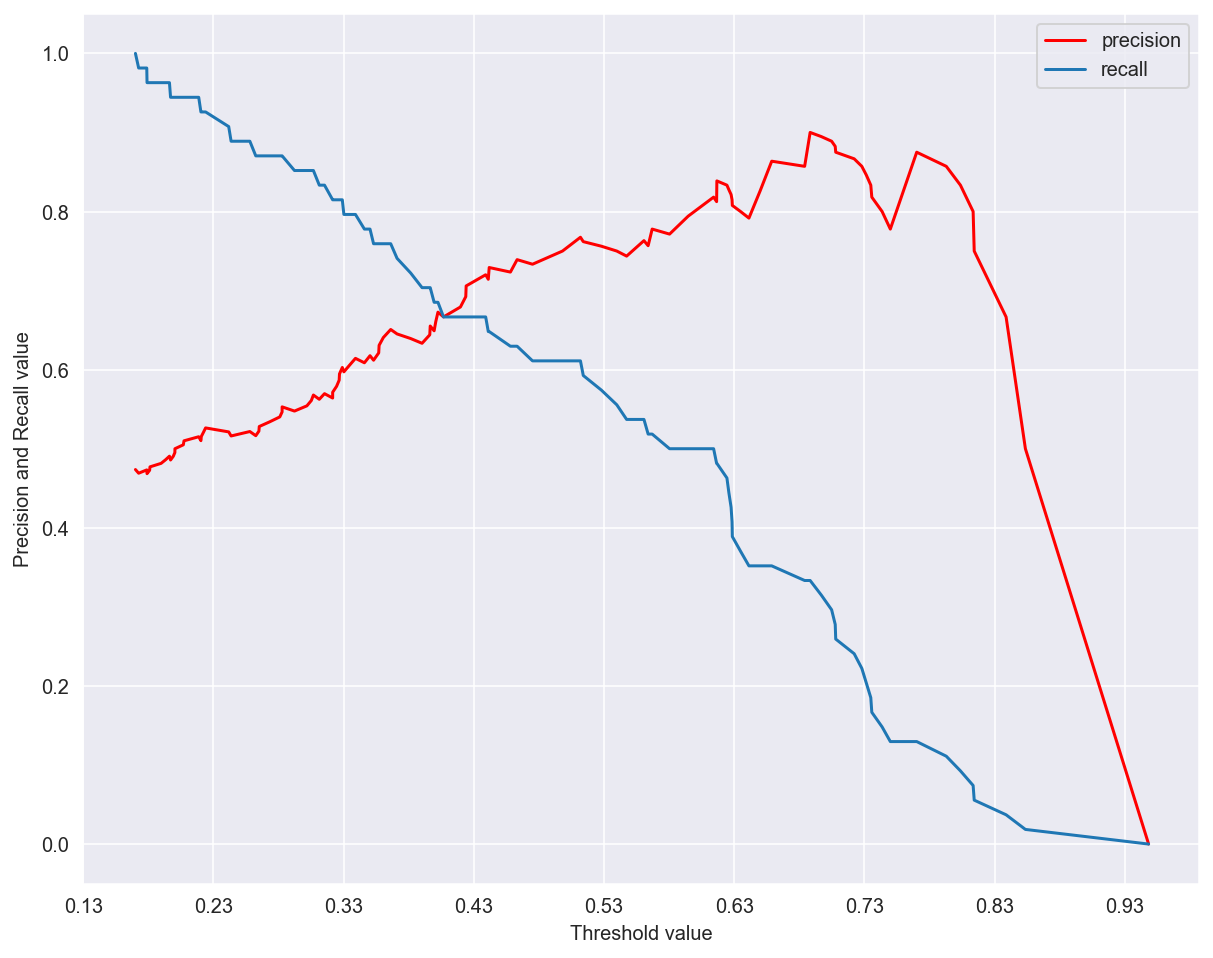

In [49]:
precision_recall_curve_plot(y_test, pred_proba_po)
# 두 그래프가 겹치는 지점(균형을 맞추는 지점)이 0.66 별로 높지 않다
# 두 지표 다 숫자가 낮다
# 임계값 조정하기 전의 점수가 오히려 높았음

In [ ]:
precision, recalls, thresholds = precision_recall_curve(y_test, pred_proba_po)

In [57]:
from ml import * 

SyntaxError: trailing comma not allowed without surrounding parentheses (ml.py, line 33)

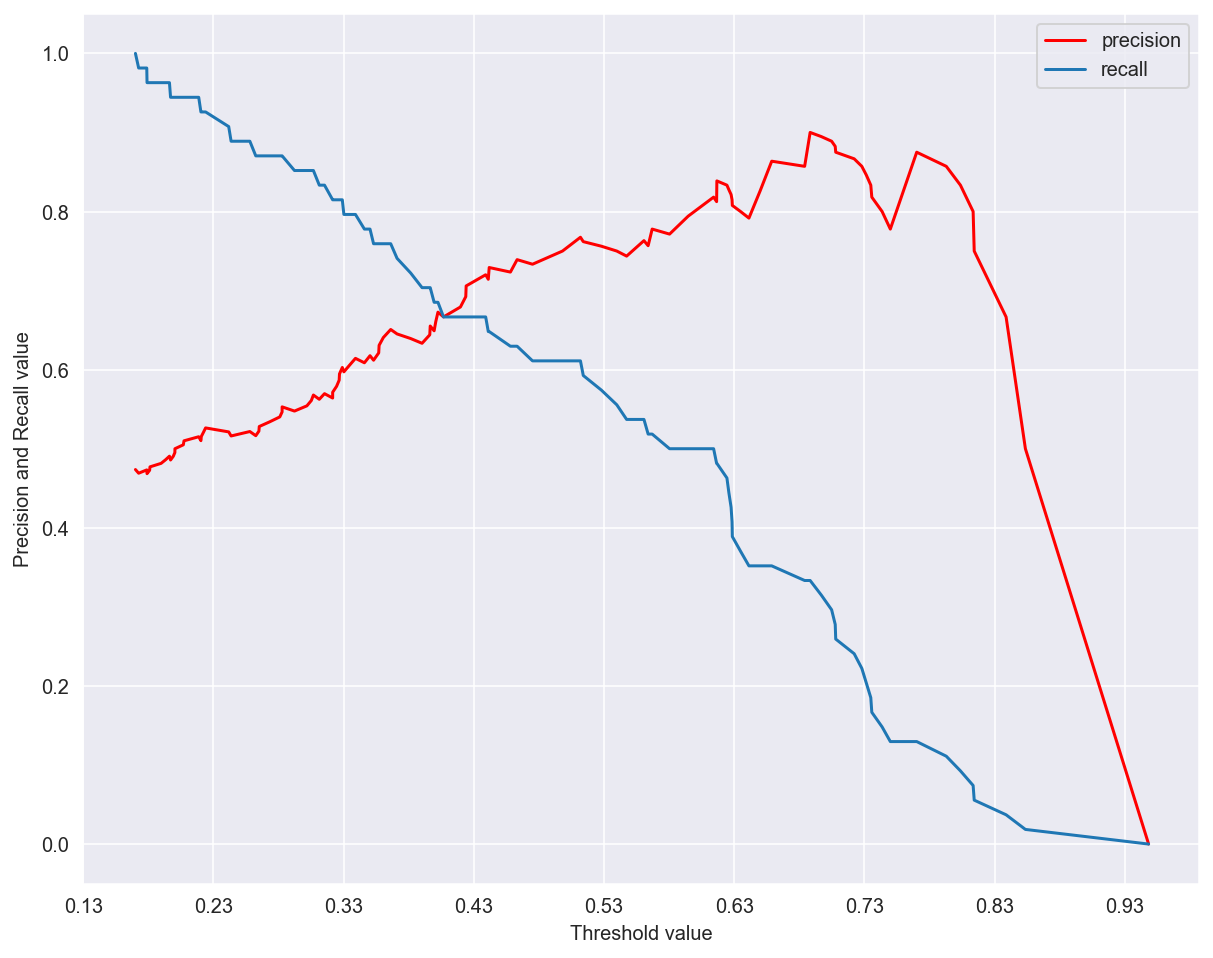

In [52]:
# 정밀도_재현율_시각화
precision_recall_curve_plot(y_test, pred_proba_po)

In [ ]:
# 당뇨병 환자한테 당뇨병이라고 말하는(재현율)게 중요하기 때문에 
# 우리는 재현율에 초점을 맞출것이다
# 우리는 1이 적기때문에 임계값(0.5~)을 높여줘야 함
# 그래야 1 값이 늘어나서 균형이 맞을거기 때문에
# 정밀도와 재현율 둘 다 보고
# 두 값이 균형을 이루는 임계점을 최적으로 구해야 함
# 정밀도와 재현율은 하나가 오르면 하나가 떨어짐
# -> 하나 촛점을 맞춰서 최적의 값을 구해야 함

In [66]:
from sklearn.preprocessing import Binarizer

# X의 개별 원소들이 threshold값보다 같거나 작으면 0을, 크면 1을 반환
binarizer = Binarizer(threshold=1.1)
print(binarizer.fit_transform(X))


from sklearn.preprocessing import Binarizer

def get_clf_eval_thres(y_test, pred_po, threshold, f1_show=False, auc_show=False):
    eval_df = pd.DataFrame()
    
    for thres in threshold:
        # threshold에 따른 예측 분류 값
        binarizer = Binarizer(threshold = thres)
        binarizer.fit(pred_po)
        thres_pred = binarizer.transform(pred_po)
        
        # 평가지표  
        accuracy = accuracy_score(y_test, thres_pred)
        precision = precision_score(y_test, thres_pred)
        recall = recall_score(y_test, thres_pred)
        f1 = f1_score(y_test, thres_pred)
        auc = roc_auc_score(y_test, pred_po)
        
        # 데이터 프레임 형태
        eval_lst = np.array([accuracy, precision, recall, f1, auc]).reshape(-1,1)
        temp = pd.DataFrame(eval_lst, columns=[thres], 
                            index = ["정확도", "정밀도", "재현율", "F1스코어", "AUC"])
        eval_df = pd.concat([eval_df,temp], axis=1)
        
    eval_df.columns.names = ["임계값"]
    
    if f1_show == False:
        eval_df.drop("F1스코어", axis=0, inplace=True)
        
    if auc_show == False:
        eval_df.drop("AUC", axis=0, inplace=True)
        
    return round(eval_df, 4)


def get_eval_by_threshold(y_test, pred_proba_c1, threshold):
    # threesholds list 객체 내의 값을 차례로 iteration하면서 Evaluation 수행
    
    for custom_threshold in thresholds:
        binarizer = Binarizer(threshold=custom_threshold).fit(pred_proba_c1)
        custom_predict = binarizer.transform(pred_proba_c1)
        print('임곗값 : ', custom_threshold)
        get_clf_eval(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

[[1. 1. 1. ... 1. 0. 1.]
 [0. 1. 1. ... 1. 0. 1.]
 [1. 1. 1. ... 1. 0. 1.]
 ...
 [1. 1. 1. ... 1. 0. 1.]
 [0. 1. 1. ... 1. 0. 1.]
 [0. 1. 1. ... 1. 0. 1.]]


In [71]:
thresholds = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.50]
pred_proba = lr.predict_proba(X_test)
get_eval_by_threshold(y_test, pred_proba[:, 1].reshape(-1, 1), thresholds)

임곗값 :  0.3


ValueError: Classification metrics can't handle a mix of binary and continuous targets

In [69]:
# threshold 리스트
thres_lst = [0.3, 0.33, 0.36, 0.39, 0.42, 0.45, 0.48, 0.5]
get_clf_eval_thres(y_test, pred_proba_po, thres_lst, f1_show=True, auc_show=True)

# F1 스코어가 높은게 좋은건데 보고 판단할 필요가 잇음
# 나는 민맥스로 해서 쌤이랑(스탠다드스케일) 다른거임

임계값,0.30,0.33,0.36,0.39,0.42,0.45,0.48,0.50
정확도,0.7078,0.7403,0.7662,0.7532,0.7792,0.7857,0.7922,0.7987
정밀도,0.5542,0.5972,0.6406,0.6333,0.6923,0.7234,0.7500,0.7674
재현율,0.8519,0.7963,0.7593,0.7037,0.6667,0.6296,0.6111,0.6111
F1스코어,0.6715,0.6825,0.6949,0.6667,0.6792,0.6733,0.6735,0.6804
AUC,0.8487,0.8487,0.8487,0.8487,0.8487,0.8487,0.8487,0.8487


In [70]:
binarizer = Binarizer(threshold = 0.48)
pred048 = binarizer.fit_transform(pred_proba_po)

get_clf_eval(y_test, pred048, pred_proba_po)

오차 행렬
[[89 11]
 [21 33]]
정확도: 0.7922, 정밀도: 0.7500,     재현율: 0.6111, F1: 0.6735, AUC:0.8487


In [73]:
binarizer = Binarizer(threshold = 0.50)
pred048 = binarizer.fit_transform(pred_proba_po)

get_clf_eval(y_test, pred048, pred_proba_po)

오차 행렬
[[90 10]
 [21 33]]
정확도: 0.7987, 정밀도: 0.7674,     재현율: 0.6111, F1: 0.6804, AUC:0.8487


1. lightGBM 장단점
    - XGB보다도 학습에 걸리는 시간이 훨씬 적으며 메모리 사용량도 상대적으로 적다
    - 카테고리형 피처를 자동 변환하고, 예측 성능 역시 큰 차이가 없다.
 2. 트리 기반 알고리즘 특징
     - 기존의 대부분 트리 기반 알고리즘은 트리의 깊이를 효과적으로 줄이기 위한 균형 트리 분할(Level Wise) 방식을 사용한다.
     - 최대한 균형 잡힌 트리를 유지하면서 분할하기 때문에 깊이가 최소화 되며 오버피팅에 보다 강한 구조를 가진다.
     - 하지만 균형을 맞추기 위한 시간이 오래 걸리는 단점이 있다.
 3. lightGBM 특징
     - lightGBM은 일반 GBM 계열의 트리 분할 방법과 다르게 리프 중심 트리 분할(Leaf wise)방식을 사용한다.
     - 트리의 균형을 맞추지 않고 최대 손실값(max delta loss)을 가지는 리프 노드를 지속적으로 분할하여 깊이가 증가하고 비대칭적인 트리를 생성한다.
     - 이렇게 생성된 트리는 학습을 반복할수록 결국은 균형 트리 분할 방식보다 예측 오류 손실을 최소화 할 수 있다는 것이 LightGBM 구현사상이다.